# Trabalho Prático - IGTI - Modulo 01 - DATA
- Autor: Caio Gabriel de Moraes
- Data : 20/05/2020
- LinkedIn: https://www.linkedin.com/in/caio-moraes-8026a6158/

# Atividades

Os alunos deverão desempenhar as seguintes atividades:
1. Criar uma conta no Google.
2. Acessar o “Google Colaboratory”
3. Desenvolver o trabalho prático

    * Para este trabalho prático, será utilizado o ambiente de desenvolvimento do Google Colab.
    * Para acessar esse ambiente, basta ter uma conta do Google ativa e acessar o Google Drive.
    * Dentro do Google Drive, clique em “New”, depois em “More” e em seguida selecione “Google Colaboratory”.
    * Após acessar o “Google Colaboratory”, você será direcionado (a) para o ambiente de desenvolvimento do Google.
    * Para essa prática será utilizada o dataset data.csv. Para baixar esse dataset acesse o link: https://drive.google.com/open?id=1P0-soA1jXBwSaB6n-ih1CwEC_CjXkPKm
4. Responder as perguntas

## Carregando as Bibliotecas

In [1]:
# import de avisos
import sys
import warnings
import matplotlib.cbook
warnings.simplefilter("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# import para manipulação dos dados
import pandas as pd
import numpy as np
import scipy
import math

# import para a visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# import para o modelo de regressão
from sklearn.linear_model import LinearRegression

# import para as métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# import para declarar os nós que devem ser executados interativamente
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# declarando o tamanho máximo das colunas e linhas
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [2]:
# versões das bibliotecas usadas nesse jupyter notebook
%reload_ext watermark
%watermark -a "Trabalho Prático - Módulo 1 - Caio Moraes" --iversions

scipy      1.4.1
numpy      1.18.1
matplotlib 3.2.0
pandas     1.0.3
seaborn    0.10.1
Trabalho Prático - Módulo 1 - Caio Moraes


## Criando as Funções

In [3]:
# função para verificar se existe valores missing no dataset
def check_missing(df, display=10):
    temp_df = df.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    df_missing = pd.DataFrame({"Missing n": temp_df.isnull().sum(), "% Missing": df_nan})
    if df_missing["Missing n"].sum() == 0:
        return print("O dataset não contém valores faltantes.")
    else:
        return df_missing.sort_values("% Missing", ascending=False).head(display)

    
# função para mostrar os valores únicos
def unique_values(df):
    print("-" * 40)
    for c in df.columns:
        print("Coluna: {0}".format(c))
        print()
        if df[c].nunique() < 15:
            print("Valores Únicos: {0}".format(df[c].unique()))
            print()
        print("Quantidade: {0}".format(df[c].nunique()))
        print()
        if df[c].dtype == np.int64 or df[c].dtype == np.float64 or df[c].dtype == np.dtype("M8[ns]"):
            print("Menor Valor: {0}".format(min(df[c])))
            print("Maior Valor: {0}".format(max(df[c])))
        print("-" * 40)


# funcao para criar um grafico de distribuicao pra cada feature do dataset
def plot_distribuition(dataset, cols=5, width=20, height=25, hspace=0.4, wspace=0.5):
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1] / cols))
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset, order=dataset[column].value_counts().index[:10])
            substrings = [s.get_text()[:20] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

## Trabalhando com o Dataset

In [4]:
# carregando o dataset
df_data = pd.read_csv("data.csv")

In [5]:
# mostrando o dataset
df_data.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [6]:
# mostrando a dimensao do dataset
df_data.shape

(120, 14)

In [7]:
# mostranso as informações do dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


In [8]:
# transformando as data de object para datetime
df_data["date_of_arrival"] = pd.to_datetime(df_data["date_of_arrival"])
df_data["date_of_departure"] = pd.to_datetime(df_data["date_of_departure"])

In [9]:
# mostrando as informações do dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   valid_import       120 non-null    bool          
 1   item               120 non-null    object        
 2   importer_id        120 non-null    int64         
 3   exporter_id        120 non-null    int64         
 4   country_of_origin  120 non-null    object        
 5   declared_quantity  120 non-null    int64         
 6   declared_cost      120 non-null    float64       
 7   mode_of_transport  120 non-null    object        
 8   route              120 non-null    object        
 9   date_of_departure  120 non-null    datetime64[ns]
 10  date_of_arrival    120 non-null    datetime64[ns]
 11  declared_weight    120 non-null    float64       
 12  actual_weight      120 non-null    float64       
 13  days_in_transit    120 non-null    float64       
dtypes: bool(1)

In [10]:
# verificando os valores únicos
unique_values(df_data)

----------------------------------------
Coluna: valid_import

Valores Únicos: [ True False]

Quantidade: 2

----------------------------------------
Coluna: item

Valores Únicos: ['cigar']

Quantidade: 1

----------------------------------------
Coluna: importer_id

Valores Únicos: [111]

Quantidade: 1

Menor Valor: 111
Maior Valor: 111
----------------------------------------
Coluna: exporter_id

Valores Únicos: [222]

Quantidade: 1

Menor Valor: 222
Maior Valor: 222
----------------------------------------
Coluna: country_of_origin

Valores Únicos: ['India' 'China' 'USA' 'France' 'Italy']

Quantidade: 5

----------------------------------------
Coluna: declared_quantity

Quantidade: 45

Menor Valor: 100
Maior Valor: 149
----------------------------------------
Coluna: declared_cost

Quantidade: 120

Menor Valor: 1441.012419437322
Maior Valor: 14281.325361521347
----------------------------------------
Coluna: mode_of_transport

Valores Únicos: ['sea']

Quantidade: 1

---------------

### Observações
- São 120 registros e 14 features:
    - valid_import == Importação Válida: Do tipo bool (True False)
    - item == Item: Do tipo object com 1 item distinto ("Cigar" / "Charuto")
    - importer_id == ID do Importador: Do tipo int64 com 1 ID distinto (111)
    - exporter_id == ID do Exportador: Do tipo int64 com 1 ID distinto (222)
    - country_of_origin == País de Origem: Do tipo object com 5 países distintos ("India" "China" "USA" "France" "Italy")
    - declared_quantity == Quantidade Declarada: Do tipo int64 com 45 quantidades distintos (do 100 até 149)
    - declared_cost == Custo Declarado: Do tipo float64 com 120 custos distintos (do 1441.012 até 14281.325)
    - mode_of_transport	== Modo de Transporte: Do tipo object com 1 modo de transporte distinto ("sea" / "mar")
    - route == Rota: Do tipo object com 4 rotas distintas ("asia" "america" "europe" "panama")
    - date_of_departure == Data de Partida: Do tipo datetime64 com 29 datas distintas (de 2019-04-18 até 2019-05-17) 
    - date_of_arrival == Data de Chegada: Do tipo datetime64 com 59 datas distintas  (de 2019-05-06 até 2019-10-07)
    - declared_weight == Peso Declarado: Do tipo float64 com 120 pesos distintos (de 18.45 até 2806.33)
    - actual_weight == Peso Atual: Do tipo float64 com 120 pesos distintos (19.27 até 2918.68)
    - days_in_transit == Dias em Trânsito: Do tipo float64 com 120 pesos distintos (12.41 até 147.78)
- As duas features do tipo datatime (date_of_departure e date_of_arrival) eram do tipo object e transformamos no tipo datetime para podermos mostrar a maior e a menor data contida no dataset

## Análise Exploratória dos Dados

In [11]:
# mostrando a descrição do dataset
df_data.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


- count = número de elementos (linhas) existente no banco de dados
- mean = média dos valores na coluna
- std = desvio padrão dos dados presentes na coluna
- min = menor valor existente na coluna
- 25% = primeiro quartil dos dados (25%)
- 50% = segundo quartil dos dados (50%)
- 75% = terceiro quartil dos dados (75%)
- max = valor máximo existente na coluna

In [12]:
# verificando se existe valores nulos
check_missing(df_data)

O dataset não contém valores faltantes.


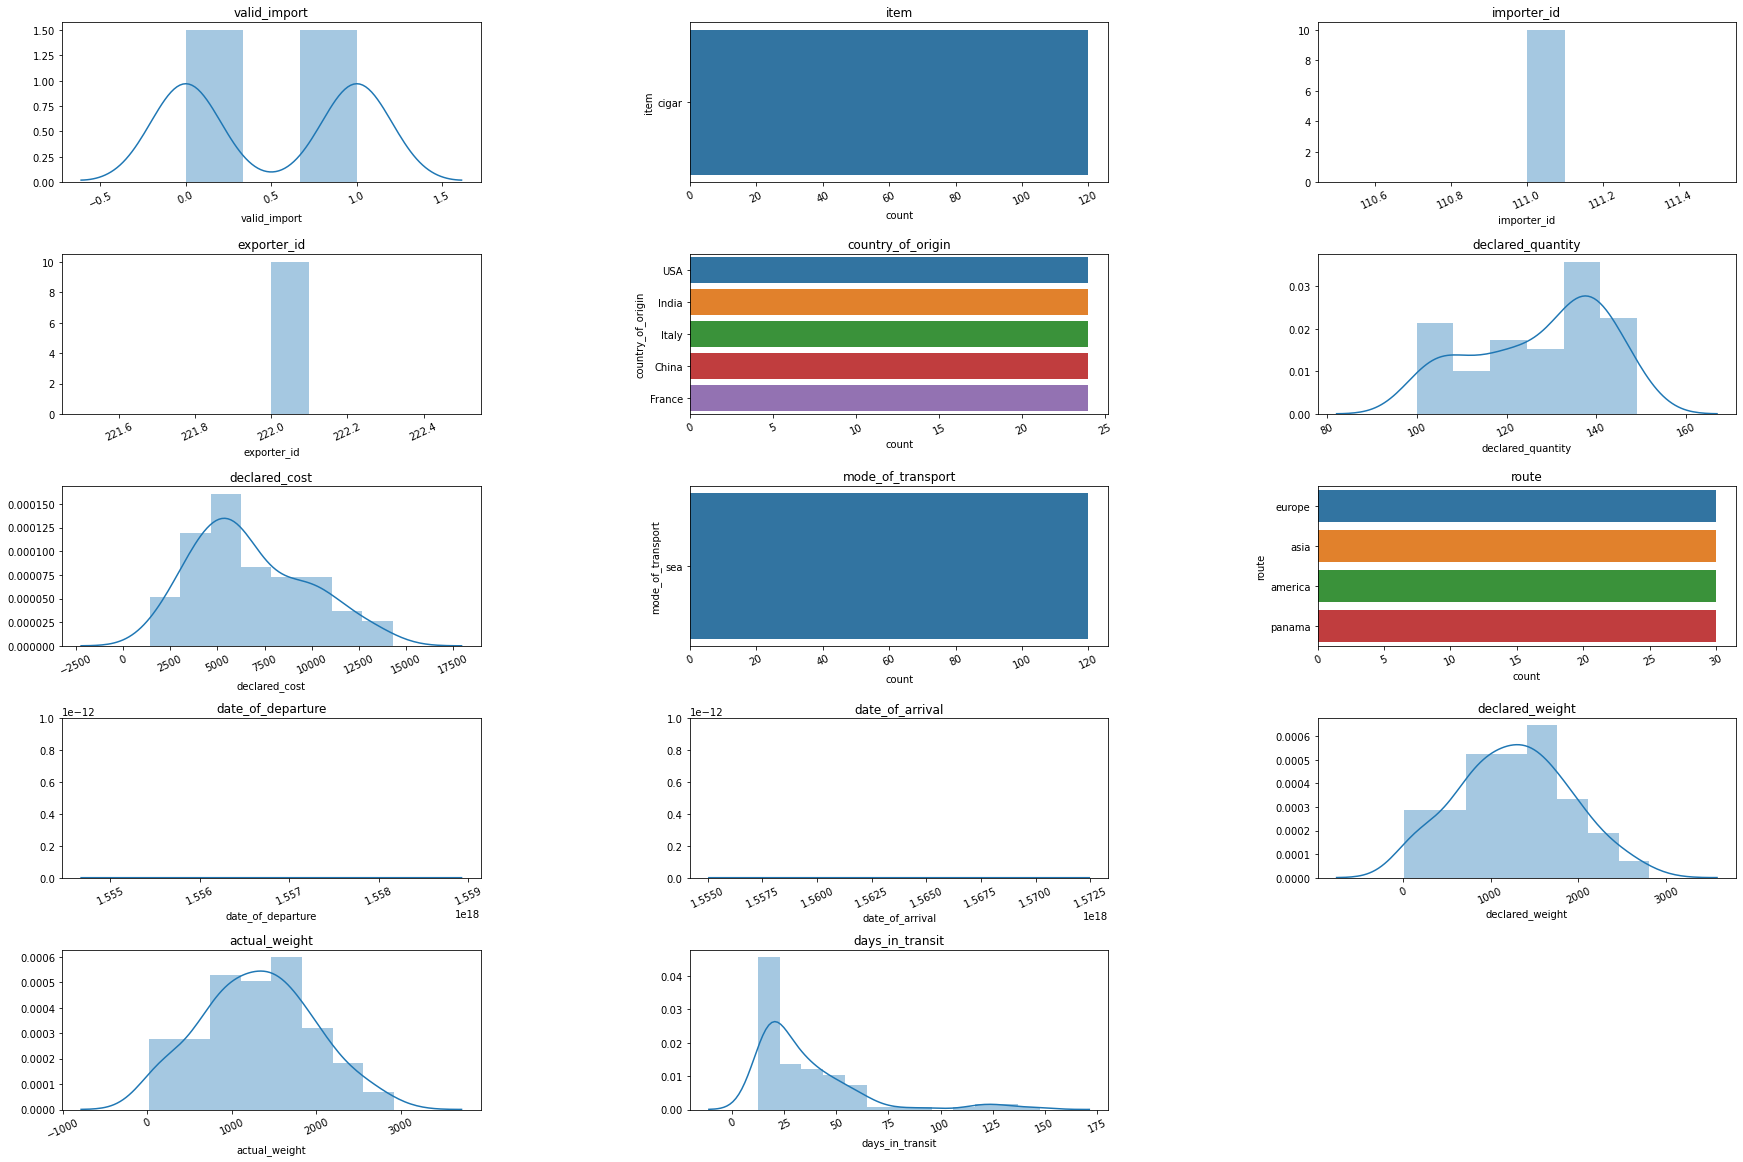

In [13]:
# chamando a função do gráfico de distribuição para cada feature do dataset
columns = df_data.columns
plot_distribuition(df_data[columns], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

### Observações
- Não existem valores nulos em nosso dataset
- Plotamos gráficos explicando cada feature contida em nosso dataset
- Cada feature pode se dizer que plota um gráfico diferente, de acordo com seus dados
- Cada gráfico explica as observações que fizemos acima

## Verificando Anomalias

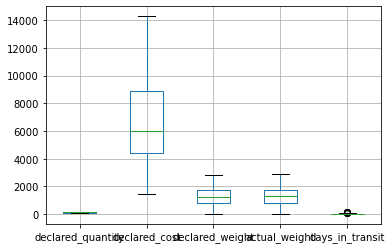

In [14]:
columns = ["declared_quantity", "declared_cost", "declared_weight", "actual_weight", "days_in_transit"]
df_data.boxplot(column=columns)

In [15]:
# z-score para o dataset
z = np.abs(scipy.stats.zscore(df_data[columns].values))
threshold = 2
result = np.where(z > threshold)
df_data_outliers = df_data.iloc[result[0]]

# mostrando o dataset com as anomalias(outliers)
df_data_outliers

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
18,True,cigar,111,222,Italy,138,13364.901196,sea,europe,2019-04-30,2019-05-20,1233.268557,1252.449858,19.829684
33,True,cigar,111,222,France,132,13142.645017,sea,america,2019-05-07,2019-06-08,1438.252279,1495.968364,31.617050
35,True,cigar,111,222,France,146,14281.325362,sea,panama,2019-05-05,2019-05-21,759.632361,779.116176,16.468842
36,True,cigar,111,222,Italy,139,13561.249072,sea,asia,2019-04-26,2019-05-18,1378.217354,1398.945854,22.102197
61,False,cigar,111,222,India,131,1594.074225,sea,america,2019-05-08,2019-09-01,1489.554025,1551.161701,116.140911
69,False,cigar,111,222,USA,140,10118.224045,sea,america,2019-05-03,2019-08-04,2406.827181,2503.169043,93.250226
73,False,cigar,111,222,France,110,8953.524711,sea,america,2019-05-16,2019-09-13,193.130429,200.966710,120.406246
74,False,cigar,111,222,France,135,12820.995855,sea,europe,2019-05-15,2019-06-01,649.710812,672.221478,16.821482
81,False,cigar,111,222,India,134,3326.973672,sea,america,2019-05-12,2019-10-07,280.984620,289.694339,147.787560
85,False,cigar,111,222,China,113,5745.640896,sea,america,2019-04-22,2019-08-28,627.941986,655.845304,128.416712


In [16]:
# mostrando a quantidade de outiliers contidos no dataset
print(len(df_data_outliers))

18


In [17]:
# vendo os indices únicos
df_data_outliers.index.unique()

Int64Index([18, 33, 35, 36, 61, 69, 73, 74, 81, 85, 88, 96, 97, 105, 112], dtype='int64')

In [18]:
# z-score para a feature declared_cost
z = np.abs(scipy.stats.zscore(df_data["declared_cost"].values))
threshold = 2
result = np.where(z > threshold)
df_data_outliers_dc = df_data.iloc[result[0]]

# mostrando o dataset com anomalias
df_data_outliers_dc

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
18,True,cigar,111,222,Italy,138,13364.901196,sea,europe,2019-04-30,2019-05-20,1233.268557,1252.449858,19.829684
33,True,cigar,111,222,France,132,13142.645017,sea,america,2019-05-07,2019-06-08,1438.252279,1495.968364,31.617050
35,True,cigar,111,222,France,146,14281.325362,sea,panama,2019-05-05,2019-05-21,759.632361,779.116176,16.468842
36,True,cigar,111,222,Italy,139,13561.249072,sea,asia,2019-04-26,2019-05-18,1378.217354,1398.945854,22.102197
74,False,cigar,111,222,France,135,12820.995855,sea,europe,2019-05-15,2019-06-01,649.710812,672.221478,16.821482


In [19]:
# mostrando a quantidade de outliers para a feature declared_cost
print(len(df_data_outliers_dc))

5


In [20]:
# z-score para a feature declared_weight
z = np.abs(scipy.stats.zscore(df_data["declared_weight"].values))
threshold = 2
result = np.where(z > threshold)
df_data_outliers_dw = df_data.iloc[result[0]]

# mostrando o dataset com anomalias
df_data_outliers_dw

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
88,False,cigar,111,222,USA,140,6189.073792,sea,asia,2019-05-10,2019-05-31,2586.146073,2667.424305,21.405148
96,False,cigar,111,222,Italy,139,11118.662308,sea,asia,2019-05-02,2019-06-10,2612.563721,2737.576055,39.038591
112,False,cigar,111,222,France,145,10686.569440,sea,asia,2019-05-01,2019-07-03,2806.338955,2918.681683,63.314998


In [21]:
# mostrando a quantidade de outliers para a feature declared_weight
print(len(df_data_outliers_dw))

3


In [22]:
# z-score para a feature actual_weight
z = np.abs(scipy.stats.zscore(df_data["actual_weight"].values))
threshold = 2
result = np.where(z > threshold)
df_data_outliers_aw = df_data.iloc[result[0]]

# mostrando o dataset com anomalias
df_data_outliers_aw

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
88,False,cigar,111,222,USA,140,6189.073792,sea,asia,2019-05-10,2019-05-31,2586.146073,2667.424305,21.405148
96,False,cigar,111,222,Italy,139,11118.662308,sea,asia,2019-05-02,2019-06-10,2612.563721,2737.576055,39.038591
112,False,cigar,111,222,France,145,10686.569440,sea,asia,2019-05-01,2019-07-03,2806.338955,2918.681683,63.314998


In [23]:
# mostrando a quantidade de outliers para a feature actual_weight
print(len(df_data_outliers_aw))

3


In [24]:
# z-score para a feature days_in_transit
z = np.abs(scipy.stats.zscore(df_data["days_in_transit"].values))
threshold = 2
result = np.where(z > threshold)
df_data_outliers_dit = df_data.iloc[result[0]]

# mostrando o dataset com anomalias(outliers)
df_data_outliers_dit

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
61,False,cigar,111,222,India,131,1594.074225,sea,america,2019-05-08,2019-09-01,1489.554025,1551.161701,116.140911
69,False,cigar,111,222,USA,140,10118.224045,sea,america,2019-05-03,2019-08-04,2406.827181,2503.169043,93.250226
73,False,cigar,111,222,France,110,8953.524711,sea,america,2019-05-16,2019-09-13,193.130429,200.966710,120.406246
81,False,cigar,111,222,India,134,3326.973672,sea,america,2019-05-12,2019-10-07,280.984620,289.694339,147.787560
85,False,cigar,111,222,China,113,5745.640896,sea,america,2019-04-22,2019-08-28,627.941986,655.845304,128.416712
97,False,cigar,111,222,Italy,144,10849.145863,sea,america,2019-05-09,2019-09-09,291.849891,303.328673,123.277846
105,False,cigar,111,222,China,139,4174.018265,sea,america,2019-05-12,2019-09-25,231.583758,243.047276,135.627561


In [25]:
# mostrando a quantidade de outliers para a feature days_in_transit
print(len(df_data_outliers_dit))

7


### Observações
- Temos 5 anomalias (outliers) para a feature declared_cost
- Temos 3 anomalias (outliers) para a feature declared_weight
- Temos 3 anomalias (outliers) para a feature actual_weight
- Temos 7 anomalias (outliers) para a feature days_in_transit
- Temos 15 anomalias (outliers) ao total do dataset
- Índices das anomalias: (18, 33, 35, 36, 61, 69, 73, 74, 81, 85, 88, 96, 97, 105, 112)
- Alguns registros se repetem nas features declared_weight e actual_weight (88, 96, 112) 

## Explorando os Dados

Text(0.5, 1.0, 'Distribuição dos Produtos pela Validação da Importação')

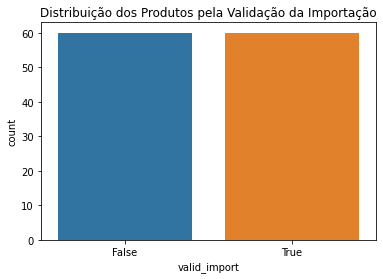

In [26]:
# analisando a distribuição dos produtos pela validação da importação
sns.countplot(x="valid_import", data=df_data)
plt.title("Distribuição dos Produtos pela Validação da Importação")

In [27]:
# verificando a quantidade de valores da coluna valid_import
df_data["valid_import"].value_counts()

True     60
False    60
Name: valid_import, dtype: int64

Text(0.5, 1.0, 'Distribuição de Produtos por País de Origem')

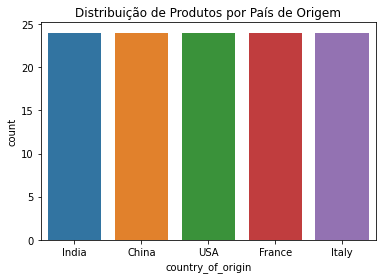

In [28]:
# analisando a distribuição dos produtos por país de origem
sns.countplot(x="country_of_origin", data=df_data)
plt.title("Distribuição de Produtos por País de Origem")

In [29]:
# verificando a quantidade de valores da coluna country_of_origin
df_data["country_of_origin"].value_counts()

USA       24
India     24
Italy     24
China     24
France    24
Name: country_of_origin, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E16EE4518>]],
      dtype=object)

Text(0.5, 1.0, 'Distribuição dos Produtos pela Quantidade Declarada')

Text(0.5, 0, 'Quantidade Declarada')

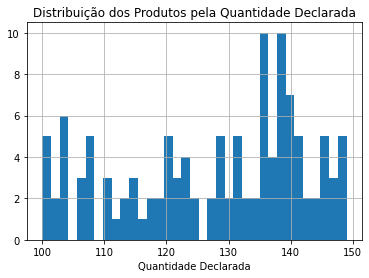

In [30]:
# analisando a distribuição dos produtos quanto a quantidade declarada com histograma
df_data.hist("declared_quantity", bins=35)  # seleciona a feature declared_quantity
# bins indicam a quantidade de grupos que se deseja dividir os dados
plt.title("Distribuição dos Produtos pela Quantidade Declarada")
plt.xlabel("Quantidade Declarada")

In [31]:
# mostrando os valores unicos da coluna declared_quantity
df_data["declared_quantity"].value_counts().head()

140    7
135    6
139    5
141    5
138    5
Name: declared_quantity, dtype: int64

Text(0.5, 1.0, 'Distribuição dos Produtos pela Rota')

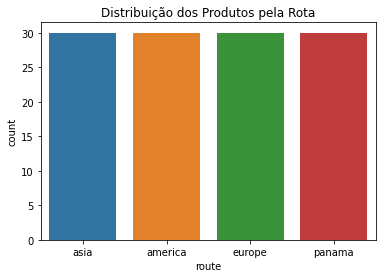

In [32]:
# analisando a distribuição dos produtos pela rota
sns.countplot(x="route", data=df_data)
plt.title("Distribuição dos Produtos pela Rota")

In [33]:
# verificando os valores únicos na coluna route
df_data["route"].value_counts()

europe     30
asia       30
america    30
panama     30
Name: route, dtype: int64

### Observações
- Temos um dataset equilibrado.
- Temos a mesma quantidade de produtos na feature valid_imports:
	- 60 True  (50 %)
	- 60 False (50 %)
- Temos a mesma quantidade de produtos na feature country_of_origin:
	- 24 India  (20 %)
	- 24 Italy  (20 %)
	- 24 China  (20 %)
	- 24 France (20 %)
	- 24 USA    (20 %)
- Temos a maioria dos produtos com a quantidade declarada de 140.
- Temos a mesma quantidade de produtos na feature route:
	- 30 Asia    (25 %)
	- 30 America (25 %)
	- 30 Europe  (25 %)
	- 30 Panama  (25 %)

## Aplicando a Regressão Linear

In [34]:
# definindo as variáveis
X = df_data["declared_weight"].values
y = df_data["actual_weight"].values
# como o formato dos dados em cada uma das colunas do dataframe são séries é necessário converter array

In [35]:
# criando o objeto do modelo de regressão linear
reg = LinearRegression()

# passando o reshape em X
X_reshaped = X.reshape((-1, 1))  # na regressão linear é necessario que o X seja 2D

# treinando o modelo
reg.fit(X_reshaped, y)

# realizando a previsão
y_pred = reg.predict(X_reshaped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# parâmetros encontrados
print("Y = {0}X {1}".format(reg.coef_, reg.intercept_))

Y = [1.03718115]X -5.296233030439225


In [37]:
# criando as métricas
mean_abs = mean_absolute_error(y, y_pred)
mean_squ = mean_squared_error(y, y_pred)
median_abs = median_absolute_error(y, y_pred)
coef_R2 = r2_score(y, y_pred)

In [38]:
# mostrando as métricas
print("Mean Abs Error:   {0}".format(round(mean_abs, 4)))
print("Mean Squ Error:   {0}".format(round(mean_squ, 4)))
print("Median Abs Error: {0}".format(round(median_abs, 4)))
print("Coef Determin R2: {0}".format(round(coef_R2, 4)))
print("Coef Angular:    {0}".format(reg.coef_))
print("Coef Linear:      {0}".format(reg.intercept_))

Mean Abs Error:   12.8471
Mean Squ Error:   287.2241
Median Abs Error: 9.7121
Coef Determin R2: 0.9993
Coef Angular:    [1.03718115]
Coef Linear:      -5.296233030439225


<Figure size 400x400 with 0 Axes>

Text(0.5, 0, 'Peso Declarado')

Text(0, 0.5, 'Peso Real')

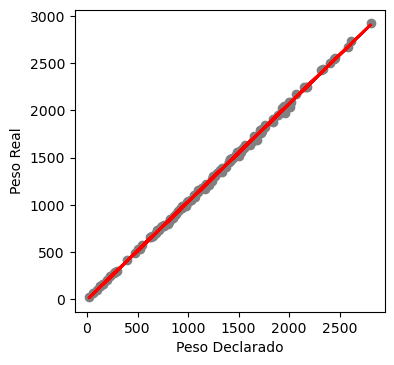

In [40]:
# realiza o plot do gráfico
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(X_reshaped, y, color="gray")  # realiza o plot da dispersão
plt.plot(X_reshaped, y_pred, color="red", linewidth=2)  # realiza o plot da linha de regressão
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()

### Observações
- Definimos as variáveis de entrada X (declared_weight) e de saída y (actual_weight)
- Criamos o objeto do modelo de regressão
- Passamos o X para 2D (reshape)
- Treinamos o modelo
- Realizamos a previsão
- Mostramos os parâmetros otimizados encontrados (coef_, intercept_)
- Criamos e mostramos as métricas de avaliação
    * Mean Abs Error:   12.8471
    * Mean Squ Error:   287.2241
    * Median Abs Error: 9.7121
    * Coef Determin R2: 0.9993
    * Coef Angular:    [1.03718115]
    * Coef Linear:      -5.296233030439225
- Plotamos o gráfico

# Questionário

**Pergunta 1:** Para a reta de regressão encontrada no trabalho, qual é o coeficiente angular da reta?
-  3.04 
-  5.8 
- -5.8 
-  **1.03**
 
**Pergunta 2:** Qual é o valor médio para a varíavel "declared_quantity" presente no dataset?
- 1306.42 
- 14.67 
- **127.45**
- 34.42 
 
**Pergunta 3:** Qual das variáveis abaixo é do tipo booleana?
- item 
- importer_id 
- declared_quantity
- **valid_import**
 
**Pergunta 4:** Após a execução da função pd.info() para o dataset presente no trabalho prático, quantos tipos diferentes de variáveis foram mostrados?
- 6 
- **4**
- 5 
- 8 
 
**Pergunta 5:** Qual foi a métrica utilizada para avaliar o modelo de regressão do trabalho prático?
- **Coeficiente de determinação** 
- Erro absoluto 
- Erro médio quadrático 
- Poisson 
 
**Pergunta 6:** Qual é a biblioteca em Python utilizada para criação de dataframes?
- Numpy 
- **Pandas**
- Matplotlib 
- Seaborn 
 
**Pergunta 7:** Para o dataset utilizado no trabalho prático, quantas colunas estão presentes?  
- 18 
- 20 
- **14**
- 13 
 
**Pergunta 8:** Para a reta de regressão encontrada no trabalho, qual é o coeficiente linear da reta?
-  8.7 
- -5.8 
-  1.03 
- **-5.29** 
 
**Pergunta 9:** Para a análise de regressão empregada no trabalho prático, qual é a variável preditora?
- actual_weight 
- exporter_id 
- days_in_transit 
- **declared_weight** 
 
**Pergunta 10:** Analisando o boxplot das variáveis 'declared_quantity' e 'days_in_transit' é possível afirmar:
- **Para a variável "days_in_transit" existem possíveis outliers.** 
- Possuem a mesma mediana. 
- Ambas são valores inteiros. 
- Não existem evidências de outliers. 
 
**Pergunta 11:** Qual é o valor do desvio padrão para a variável "declared_weight" presente no dataset do trabalho prático?
- 1005.36 
- **633.14** 
- 13.04 
- 128,47 
 
**Pergunta 12:** A função head (pandas.head( )) mostra quantas linhas no modo "padrão" (default)?
- 10 
- **5** 
- 3 
- 15 
 
**Pergunta 13:** Para o dataset presente no trabalho prático, quantas colunas são do tipo inteiro (int64)?
- 4 
- **3**
- 1 
- 0 

**Pergunta 14:** Para o dataset presente no trabalho prático, quantas linhas existem?
- 33 
- 100 
- 14 
- **120**

**Pergunta 15:** Sobre o coeficiente de determinação encontrado para a reta do trabalho prático, é correto afirmar:
- **Possui um valor muito próximo de 1, indicando que ocorreu um bom "fit" para os dados**
- Não pode ser calculado. 
- Nada pode ser dito, pois apresenta um valor próximo a zero. 
- Apresenta valor negativo 